# Introduction à Keras 

"
Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the “backend engine” of Keras.*
The Python Keras API uses TensorFlow™ as it’s default tensor backend engine, however it’s possible to use other backends if desired. At this time, Keras has two backend implementations available:
-  TensorFlow is an open-source symbolic tensor manipulation framework developed by Google.
-  Theano is an open-source symbolic tensor manipulation framework developed by LISA Lab at Université de Montréal.
"

> Vérifier que la libraire Keras est bien installée.
> Dans le cas contraire vous pouvez installer Keras via le [gestionnaire d'environnement d'Anaconda](https://www.logicalfeed.com/posts/1224/install-tensorflow-keras-and-theano-using-anaconda-for-deep-learning), en [ligne de commandes conda](https://anaconda.org/conda-forge/keras) ou encore avec `pip install Keras`.

In [1]:
import tensorflow as tf
from tensorflow import keras

## Importation des données

Dans ce TP, nous allons illustrer les fonctionnalitées de [Keras](https://keras.io/getting_started/intro_to_keras_for_engineers/) sur la base de données des [handwritten digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) de sckit-learn.

Il s'agit d'un problème de classification à 10 classes (10 digits). 

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [4]:
digits = load_digits()

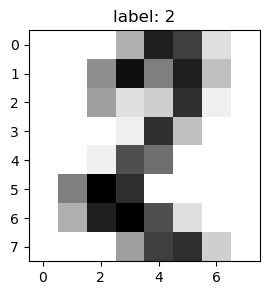

In [5]:
sample_index = 50
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("label: %d" % digits.target[sample_index]);

> Normaliser les données avec la fonction `preprocessing.scale()` et séparer celles-ci en deux échantillons d'apprentissage et de test. Afficher la dimension des deux jeux de données.

In [6]:
digits.data_nor = preprocessing.scale(digits.data)

X_train_nor, X_test_nor, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.4)

Les dimensions des deux jeux de données:

In [7]:
print(X_train_nor.shape, y_train.shape)
print(X_test_nor.shape, y_test.shape)

(1078, 64) (1078,)
(719, 64) (719,)


## Feed Forward Neural Network avec Keras

Nous allons maintenant définir et ajuster un modèle à propagation avant (Feed Forward) avec Keras.

#### Pre-processing

La variable de classe (chiffre correspondant) indique le numéro de la catégorie : 

In [8]:
y_train[:3]

array([6, 8, 0])

Avec Keras, pour construire un réseau de neurones adapté à ce problème de la classification multiclasses, il faut préalablement transformer la variable de classe sous la forme "one hot encoding" i.e. transformer la variable de classe en un vecteur indiquant l'appartenance à chacune des classes sous forme d'indicatrices :

In [9]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Definition de l'architecture

Nous allons maintenant construire un premier réseau à propagation avant :

In [10]:
from keras.models import Sequential

On importe les fonctionnalités qui permettent de définir, de façon successive, les différentes couches :
- Dense : permet de définir les pré-activations, c'est dans cette couche que se situent les poids et les termes de biais.
- Activation :  permet de définir les fonctions d'activation.

In [11]:
from keras.layers.core import Dense, Activation

Les dimensions du modèle : 

In [12]:
N = X_train_nor.shape[1]  # dimension en entrée
N

64

In [13]:
H = 128 # dimension de la couche cachée
K = 10  # nombre de classes en sortie (autant que de chiffres ici)

On peut maintenant définir l'architecture du réseau :

In [14]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-01-06 09:54:58.474265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-06 09:54:58.475157: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Il est possible de résumer l'architecture avec la méthode `summary()`:

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________


Le nombre de paramètres est indiqué dans la dernière colonne, notez que seules les couches `dense` contiennent ici des paramètres à ajuster.

Les dimensions en sortie de chaque couche sont de la forme `(None, ...)`. Lorsque le réseau sera ajusté sur un échantillon, la première dimension indiquera la taille de l'échantillon.

Vous pouvez visualiser (dans un fichier .png) l'architecture ainsi. Si vous êtes confronté à des problèmes d'installation (librairies `pydot`, `graphviz` ...), ne perdez pas trop de temps sur cette partie.

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### Poids du réseau

Le contenu (les poids) de chaque couche du réseau est accessible dans la liste `model.layers`. Par exemple pour la premiere couche :

In [19]:
my_first_layer = model.layers[0]

Le tableau contenant les valeurs des poids et les termes de biais de cette première couche sont accessibles avec la méthode `get_weights()`. La méthode renvoie en fait une liste contenant
- le tableau numpy des poids,
- le vecteur des termes de biais.

> Vérifier que le tableau des poids ainsi que les termes de biais possèdent les dimensions attendues compte tenu de ce que nous avons vu dans le `model.summary()` plus haut. Retrouvez le nombre de paramètres affichés dans le `model.summary()`.

In [20]:
len(my_first_layer.get_weights()[0]), len(my_first_layer.get_weights()[1])
print(f'Number of parameters: Input : {len(my_first_layer.get_weights()[1])} neurones, each one with {len(my_first_layer.get_weights()[0])} weights and {1} bias, totalling {len(my_first_layer.get_weights()[0])*len(my_first_layer.get_weights()[1])+len(my_first_layer.get_weights()[1])} parameters')

Number of parameters: Input : 128 neurones, each one with 64 weights and 1 bias, totalling 8320 parameters


> Bien que le réseau n'ait pas encore été ajusté sur des données, vérifier que la définition de l'architecture implique une intialisation immédiate des poids du réseau (i.e. les poids prennent des valeurs). 
> Vérifier aussi que les biais sont initialisés à zéro.

In [21]:
my_first_layer.get_weights()[1], my_first_layer.get_weights()[0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.14206384,  0.04763252, -0.08167039, ...,  0.10865326,
         -0.0917622 , -0.16580777],
        [-0.0363474 ,  0.10334192, -0.02152199, ..., -0.00885797,
         -0.1208163 ,  0.05392368],
        [ 0.05086955,  0.06425789,  0.03130385, ...,  0.13847949,
         -0.16743551, -0.15722485],
        ...,
        [-0.12340045, -0.15541461, -0.1536261 , ...,  0.15534078,
         -0.09914371, 

### Apprentissage : ajustement des poids du réseau

La phase d'apprentissage consiste à estimer le vecteur $\theta$ (qui contient tous les paramètres du réseau : poids et biais) en cherchant à minimiser en $\theta$ le risque empirique (ici sans pénalité) 
$$ \theta \mapsto \frac 1{n} \sum_{i=1}^n  \ell( f(X_i , \theta),Y_i) $$
où $f(\cdot , \theta)$ est la fonction qui correspond au réseau de neurones et où $\ell$ est la perte choisie. Pour le problème de classification multiclasses qui nous intéresse ici il s'agit de la cross-entropy.

On utilise pour cela une méthode d'optimisation de type descente de gradient stochastique, appliquée au risque empirique pénalisé. Par exemple pour `SGD`, chaque itération effectue un pas de gradient, en calculant ce gradient sur un sous-échantillon des données (échantillon batch):
$$ \theta_b  =   \theta_{b-1}  - \varepsilon   \frac 1{|B|} \sum_{i \in B}  \nabla_\theta \ell( f(X_i , \theta_{b-1}),Y_i)   
 $$
où $\varepsilon$ est le taux d'apprentissage (learning rate).

Le module `optimizers` de Keras permet de choisir la méthode d'optimisation. On utilise ci-dessous l'optimiseur `SGD`, avec l'argument `lr` pour régler le taux d'apprentissage :

In [22]:
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.08)

Nous allons maintenant ajuster sur les données digits un réseau de neurones à une couche cachée.

L'ajustement est effectué en deux temps : compilation puis ajustement sur les données.

On spécifie les éléments nécessaires à l'ajustement  avec la méthode  `compile` :
- optimiseur,
- perte considérée pour la back propagation (dans l'algo de descente de gradient)
- "métriques" à considérer pour évaluer l'erreur. On pourrait bien sûr évaluer l'erreur uniquement pour la cross-entropy, mais l'erreur pour la perte sèche $\ell(y,y') = 1_{y \neq y'}$ est plus facile à interpréter, on choisit donc de suivre  aussi la métrique "accuracy" (précision = taux de bien classé) le long de la trajectoire de descente de gradient.

In [23]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Dans les arguments de la méthode `.fit` ci-dessous:
- epochs = nombre de passages sur l'ensemble de l'échantillon  ;
- batch_size = taille du sous-échantillon extrait (batch) pour le calcul du gradient à chaque itération.

In [24]:
model.fit(X_train_nor, Y_train, epochs=15, batch_size=32)

Epoch 1/15


2023-01-06 10:10:14.263957: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/34 [..............................] - ETA: 12s - loss: 10.0143 - accuracy: 0.0625

2023-01-06 10:10:14.505668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 13ms/step - loss: 4.9505 - accuracy: 0.3627
Epoch 2/15
34/34 [==============================] - 0s 13ms/step - loss: 0.8434 - accuracy: 0.7226
Epoch 3/15
34/34 [==============================] - 0s 12ms/step - loss: 0.3891 - accuracy: 0.8840
Epoch 4/15
34/34 [==============================] - 0s 11ms/step - loss: 0.2325 - accuracy: 0.9165
Epoch 5/15
34/34 [==============================] - 0s 11ms/step - loss: 0.2569 - accuracy: 0.9165
Epoch 6/15
34/34 [==============================] - 0s 13ms/step - loss: 0.1610 - accuracy: 0.9555
Epoch 7/15
34/34 [==============================] - 0s 12ms/step - loss: 0.0875 - accuracy: 0.9685
Epoch 8/15
34/34 [==============================] - 0s 11ms/step - loss: 0.0856 - accuracy: 0.9694
Epoch 9/15
34/34 [==============================] - 0s 11ms/step - loss: 0.0686 - accuracy: 0.9712
Epoch 10/15
34/34 [==============================] - 0s 11ms/step - loss: 0.0570 - accuracy: 0.9787
Epoch 11/15
34/34 [=

> Chaque ligne correspond à un passage sur l'ensemble des données (= un epoch). Nous avons choisi un batch size de 32 observations. Combien de pas de gradients sont donc effectués par epoch pour ce choix de paramètres ?

In [25]:
len(X_train_nor)/32

33.6875

> La perte cross entropy (ici utilisé pour désigner le risque empirique pour la cross entropy) et la précision (accuracy) s'améliorent-elles le long de la trajectoire de descente de gradient ?

Oui, en général, oui.

Les poids sont enregistrés dans `model.layers`. 

> Les biais sont ils toujours à zero ?

In [26]:
my_first_layer.get_weights()[1]

array([-0.0080098 ,  0.00302083,  0.        ,  0.01163247, -0.00742343,
       -0.00373849, -0.00034983,  0.01340199, -0.00845615, -0.00654745,
       -0.00705523,  0.        ,  0.00159001, -0.00956257, -0.0097026 ,
        0.        ,  0.        , -0.01608782, -0.00694454, -0.01039723,
       -0.01387762, -0.00600902, -0.00254576, -0.00537221, -0.00972651,
       -0.01555341, -0.00520209, -0.02287226, -0.01000183, -0.00370524,
        0.        , -0.00365021, -0.00755534, -0.00938972, -0.00033002,
        0.00075805,  0.00389214, -0.00911511,  0.00211454, -0.0049466 ,
       -0.00266234, -0.00903128, -0.01458798, -0.00991779, -0.00283895,
       -0.01112631, -0.01017199, -0.00399857, -0.00042908,  0.00104383,
       -0.00651086, -0.00986998, -0.01367376, -0.02365081, -0.0166434 ,
       -0.00325071,  0.00050296, -0.03135969, -0.00112311, -0.01036726,
       -0.00223453, -0.01217016,  0.00076903, -0.00458114, -0.01443091,
       -0.01947634, -0.00658325, -0.00796031, -0.01014394, -0.01

> En comparant les valeurs de la perte et de l'accuracy, vérifier (sur les sorties) que si l'on effectue l'ajustement une seconde fois, l'état initial pour le second essai correspond à l'état du réseau précédemment ajusté.

> Essayer de diminuer encore la perte en augmentant le nombre d'épochs, en diminuant le taux d'apprentissage (par exemple 0.001).   
> Remarque : si vous souhaitez réinitialiser les poids, il vous faut "réinstancier" le modèle en le redéfinissant totalement. 

In [27]:
model2 = Sequential()
model2.add(Dense(H, input_dim=N))
model2.add(Activation("relu"))
model2.add(Dense(K))
model2.add(Activation("softmax"))

> Que dire de la convergence pour une grande valeur du taux d'apprentissage (par exemple `lr=2`) ?

In [28]:
sgd2 = SGD(lr=2) 

model2.compile(optimizer=sgd2,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train_nor, Y_train, epochs=10, batch_size=32)

Epoch 1/10


/Users/dgalembeck/miniforge3/envs/IA/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-01-06 10:11:43.910174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 14ms/step - loss: 39381.0156 - accuracy: 0.1030
Epoch 2/10
34/34 [==============================] - 0s 12ms/step - loss: 2.3193 - accuracy: 0.0955
Epoch 3/10
34/34 [==============================] - 0s 12ms/step - loss: 2.3273 - accuracy: 0.0928
Epoch 4/10
34/34 [==============================] - 0s 12ms/step - loss: 2.3232 - accuracy: 0.0863
Epoch 5/10
34/34 [==============================] - 0s 13ms/step - loss: 2.3257 - accuracy: 0.0844
Epoch 6/10
34/34 [==============================] - 0s 14ms/step - loss: 2.3225 - accuracy: 0.0891
Epoch 7/10
34/34 [==============================] - 0s 12ms/step - loss: 2.3282 - accuracy: 0.0826
Epoch 8/10
34/34 [==============================] - 0s 12ms/step - loss: 2.3206 - accuracy: 0.0937
Epoch 9/10
34/34 [==============================] - 0s 12ms/step - loss: 2.3173 - accuracy: 0.1085
Epoch 10/10
34/34 [==============================] - 0s 12ms/step - loss: 2.3247 - accuracy: 0.0974


> Essayer aussi d'utiliser une méthode `Momentum-SGD` (argument `momentum= True`).  

In [29]:
model3 = Sequential()
model3.add(Dense(H, input_dim=N))
model3.add(Activation("relu"))
model3.add(Dense(K))
model3.add(Activation("softmax"))

sgd3 = SGD(learning_rate=0.0007, momentum = True) 

model3.compile(optimizer=sgd3,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train_nor, Y_train, epochs=15, batch_size=32)

Epoch 1/15
 5/34 [===>..........................] - ETA: 0s - loss: 6.6878 - accuracy: 0.0500

2023-01-06 10:11:52.342838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 13ms/step - loss: 3.6569 - accuracy: 0.4045
Epoch 2/15
34/34 [==============================] - 0s 12ms/step - loss: 0.8178 - accuracy: 0.7384
Epoch 3/15
34/34 [==============================] - 0s 13ms/step - loss: 0.4998 - accuracy: 0.8432
Epoch 4/15
34/34 [==============================] - 0s 12ms/step - loss: 0.4064 - accuracy: 0.9007
Epoch 5/15
34/34 [==============================] - 0s 12ms/step - loss: 0.4000 - accuracy: 0.9193
Epoch 6/15
34/34 [==============================] - 0s 12ms/step - loss: 0.3217 - accuracy: 0.9536
Epoch 7/15
34/34 [==============================] - 0s 12ms/step - loss: 0.3103 - accuracy: 0.9508
Epoch 8/15
34/34 [==============================] - 0s 12ms/step - loss: 0.2055 - accuracy: 0.9722
Epoch 9/15
34/34 [==============================] - 0s 12ms/step - loss: 0.3443 - accuracy: 0.9545
Epoch 10/15
34/34 [==============================] - 0s 13ms/step - loss: 0.4221 - accuracy: 0.9647
Epoch 11/15
34/34 [=

### Predictions et erreur de généralisation

> Effectuer des prédictions de votre réseau sur l'échantillon test avec la méthode `.predict()`.

In [34]:
y_predicted = model.predict(X_test_nor)
y_predicted1 = np.array([np.argmax(y_predicted) for y_predicted in y_predicted])
y_predicted[0], y_predicted1[0]

23/23 [==============================] - 0s 3ms/step


(array([1.7384707e-11, 1.3939776e-07, 9.9999928e-01, 5.9847480e-07,
        2.2660374e-12, 1.1731784e-08, 4.0228512e-10, 1.2117862e-08,
        3.8731924e-09, 1.9048527e-09], dtype=float32),
 2)

> Pour plusieurs élements de l'échantillon test, renvoyer les probabilités conditionnelles prédites par le réseau (en sortie du Softmax) à l'aide de la méthode `.model.predict()`. La probabilité de la classe choisie est-elle générallement bien supérieure aux probabilités des autres classes ?
Calculer le taux de bien classé sur l'échantillon test.

Text(0.5, 1.0, 'predicted label: 9\n true label: 9')

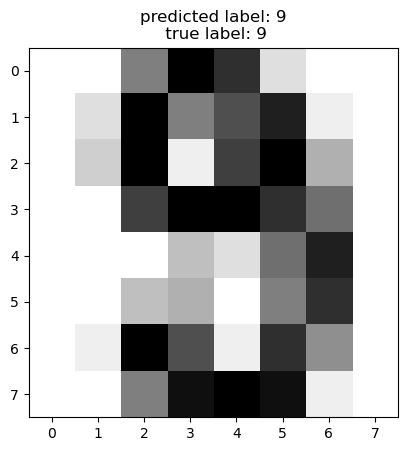

In [35]:
sample_idx = 2
plt.imshow(X_test_nor[sample_idx].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest');
plt.title("predicted label: %d\n true label: %d"
              % (y_predicted1[sample_idx], y_test[sample_idx]))

    

In [36]:
probabilities = y_predicted
probabilities[sample_idx] 

array([4.7746789e-07, 1.5617731e-08, 1.4082582e-07, 1.2783867e-07,
       6.8609407e-09, 4.1770793e-08, 5.2798534e-12, 1.0890425e-06,
       8.9407195e-06, 9.9998927e-01], dtype=float32)

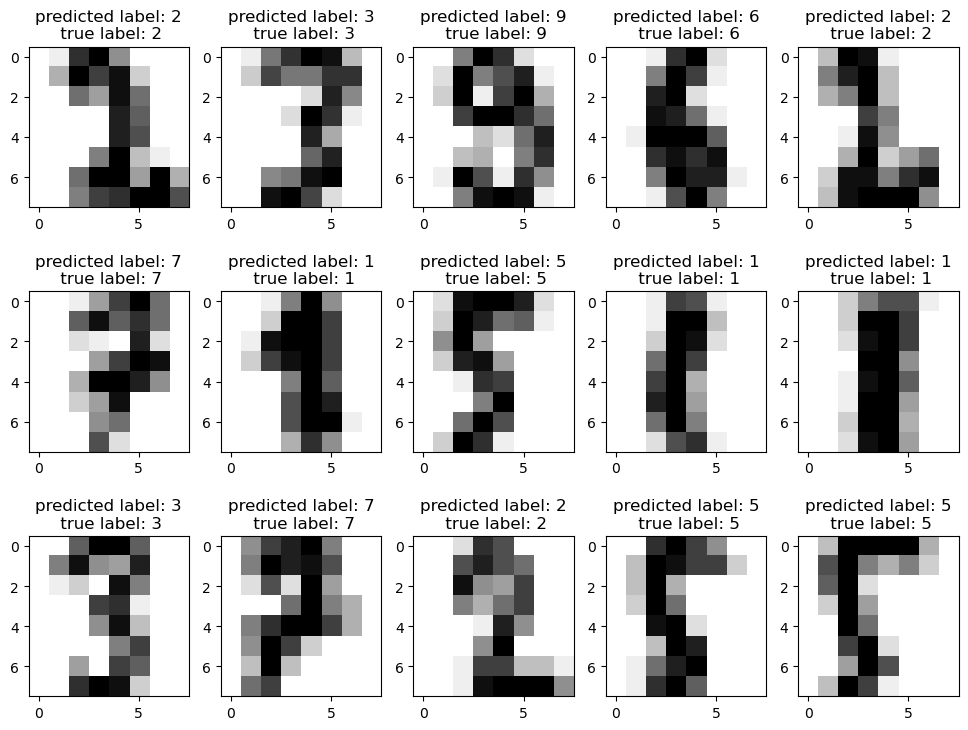

In [37]:
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test_nor[i].reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("predicted label: %d\n true label: %d"
              % (y_predicted1[i], y_test[i]))
  

In [38]:
(y_predicted1 == y_test).mean()

0.9791376912378303

On rappelle que la perte empirique pour la cross-entropy vaut
\begin{eqnarray*}
\hat{ \mathcal R}_n (\theta)  &=&  \frac 1n  \sum_{i=1}^n  \ell( Y_i,  f(X_i , \theta)) \\ 
& =&   -    \frac 1n \sum_{i=1}^n  \sum_{k = 1}^K  \mathbb{1}_{Y_i =  k}  \log (f(X_i , \theta)_k)  
\end{eqnarray*}


> Calculer ("à la main") le risque empirique (pour la cross entropy) sur l'échantillon test. Le risque était-il plus faible sur l'échantillon d'apprentissage  ?

In [49]:
from tensorflow.keras.losses import CategoricalCrossentropy

cce = CategoricalCrossentropy()
#y_test1, y_predicted
cce(y_test1, y_predicted).numpy()

0.11132604

#### > Plus simplement, on peut utiliser la méthode `.evaluate(x,y)`  pour retrouver la perte empirique et l'accuracy. Ce calcul correspond-il à une passe de propagation avant ou bien à un pas de back-propagation ?

In [50]:
model.evaluate(X_test_nor, y_predicted)

11/23 [=============>................] - ETA: 0s - loss: 0.0484 - accuracy: 1.0000

2023-01-06 10:19:28.366423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 12ms/step - loss: 0.0514 - accuracy: 1.0000


[0.05142224580049515, 1.0]

### Impact de l'initialisation

Nous allons maintenant étudier l'impact de l'initialisation de la méthode SGD sur la convergence de ce dernier.

Dans Keras, par défaut les poids sont initialisés comme suit par l'initialiseur `glorot_uniform` :

- chaque poids est tiré uniformément dans $[-scale, scale]$
- scale est choisi de l'ordre de $\frac{1}{\sqrt{n_{in} + n_{out}}}$

Nous allons étudier l'impact de l'initialisation en considérant des initialiseurs Gaussiens en testant plusieurs valeurs pour la variance.

In [51]:
from keras import initializers
mon_init1 = initializers.RandomNormal(mean=0.0, stddev=0.05)

> Définir un réseau avec une couche Softmax en sortie et deux couches cachées "tanh", avec respectivement H neurones et K neurones. (On utilise ici des activations "tanh" pour que le problème soit un peu plus difficile à résoudre pour le réseau ...)
> Passer l'initialiseur en argument de `Dense()`, ce qui donne par exemple pour la première couche :   
`model.add(Dense(H,input_dim=N,kernel_initializer=mon_init1))`.

In [52]:
model4 = Sequential()
model4.add(Dense(H, input_dim=N,kernel_initializer=mon_init1))
model4.add(Activation("tanh"))
model4.add(Dense(K))
model4.add(Activation("softmax"))

> Ajuster le réseau et afficher l'évolution de la perte (i.e. risque empirique) sur les données d'apprentissage le long de la trajectoire des epochs.

In [53]:
sgd4 = SGD(learning_rate=0.08)
model4.compile(optimizer=sgd4,
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

history1 = model4.fit(X_train_nor, Y_train,epochs=20,
                     batch_size=32,verbose=0)

2023-01-06 10:19:41.278881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


On peut afficher l'évolution de la perte sur l'apprentissage comme suit :

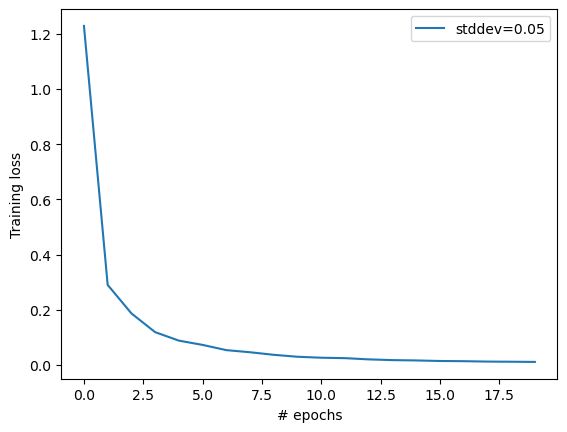

In [54]:
plt.plot(history1.history['loss'],label = "stddev=0.05")
plt.xlabel('# epochs')
plt.ylabel('Training loss')
#plt.ylim(0, 6)
plt.legend(loc='best');

> Faire de même avec les initialiseurs suivants :    
> `mon_init2 = initializers.RandomNormal(mean=0.0,stddev=10)`   
> `mon_init3 = initializers.RandomNormal(mean=0.0,stddev=0.001)` \
> `mon_init4 = initializers.glorot_uniform()`    

2023-01-06 10:19:55.729938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-06 10:20:03.812936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-06 10:20:11.044586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


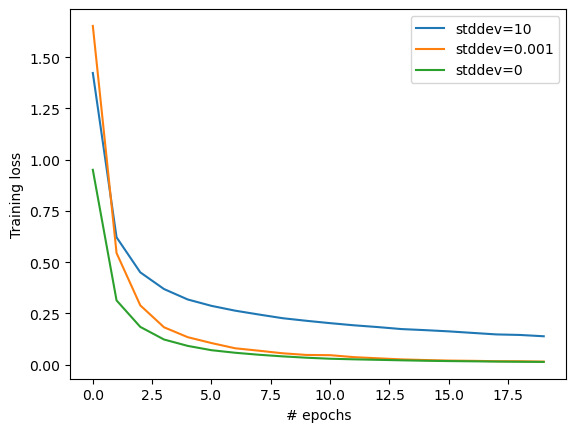

In [55]:
list_inits = [initializers.RandomNormal(mean=0.0,stddev=10), initializers.RandomNormal(mean=0.0,stddev=0.001), initializers.glorot_uniform()]

for mon_init, std in zip(list_inits, [10, 0.001, 0]): 

    model4 = Sequential()
    model4.add(Dense(H, input_dim=N,kernel_initializer=mon_init))
    model4.add(Activation("tanh"))
    model4.add(Dense(K))
    model4.add(Activation("softmax"))

    sgd4 = SGD(learning_rate=0.08)
    model4.compile(optimizer=sgd4,
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) 

    history1 = model4.fit(X_train_nor, Y_train,epochs=20,
                         batch_size=32,verbose=0)

    plt.plot(history1.history['loss'],label = f"stddev={std}")
    plt.xlabel('# epochs')
    plt.ylabel('Training loss')
    plt.legend(loc='best');

> Comparer les performance des réseaux ajustés avec ces initialiseurs en représentant les "trajectoires d'apprentissage".

Conclusion:
- Initialisation trop proche de zero : gradients trop faibles et SGD peine à sortir de cette zone ...
- Initialisation avec des amplitudes trop élevées : les couches intermédiaires ont des gradients qui s'annulent et difficile là encore de sortir de cette zone

### Early Stopping


L'argument ` validation_split=0.1` dans la méthode `.fit()` permet d'évaluer la perte sur un échantillon de validation. 

> Vérifier graphiquement qu'après un certain nombre d'itérations (quelques centaines epochs ici), le risque et la précision sur l'échantillon de validation  finissent par se dégrader. 

2023-01-06 10:52:11.340152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-06 10:52:12.320693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


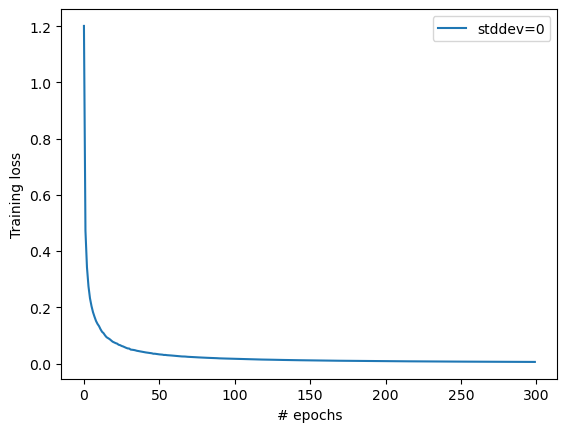

In [57]:
list_inits = [initializers.RandomNormal(mean=0.0,stddev=10), initializers.RandomNormal(mean=0.0,stddev=0.001), initializers.glorot_uniform()]

for mon_init, std in zip(list_inits, [0]): 

    model5 = Sequential()
    model5.add(Dense(H, input_dim=N,kernel_initializer=mon_init))
    model5.add(Activation("tanh"))
    model5.add(Dense(K))
    model5.add(Activation("softmax"))

    sgd5 = SGD(learning_rate=0.08)
    model5.compile(optimizer=sgd4,
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) 

    history2 = model5.fit(X_train_nor, Y_train,epochs=300,
                         batch_size=16,verbose=0, validation_split=0.1)

    plt.plot(history2.history['loss'],label = f"stddev={std}")
    plt.xlabel('# epochs')
    plt.ylabel('Training loss')
    plt.legend(loc='best');

Les réseaux de neurones, même sans parler des architectures "profondes", nécessitent d'ajuster un très grand nombre de paramètres. Il est donc naturel de devoir contrôler la complexité statistique de ces prédicteurs pour en obtenir les meilleurs erreurs de généralisation. 

A chaque pas de la descente de gradient l'ensemble des poids et des biais du réseau est mis à jour. A chaque pas de la descente correspond donc un prédicteur, et au final on dispose donc d'une suite de prédicteurs. Le prédicteur final (du dernier pas de gradient) est certes celui qui minimise le risque empirique (appelée ici perte) mais cela ne signifie évidemment pas que ce prédicteur a les meilleurs performances sur l'échantillon de validation (ou de test).


La méthode classiquement utilisée pour choisir le nombre de pas de gradients est celle du "early stopping".  Le principe consiste tout simplement à stopper la descente de gradient stochastique lorsque l'erreur de validation remonte. L'argument `monitor='val_loss'` de la fonction `EarlyStopping` indique que c'est l'erreur de validation calculée pour la perte (ici cross entropy) qui sera surveillée.

In [58]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Le long d'une trajectoire de descente de gradient, il est possible que la perte remonte ponctuellement sur une itération, avant de redescendre aussitôt. Il est donc préférable de ne prendre la décision d'arrêter la descente de gradient que si cette remontée se confirme sur quelques itérations successives. L'argument `patience=5` impose à la descente de gradient de patienter 5 itérations après une remontée de la perte, avant de prendre la décision d'arrêter  ou non l'algorithme.

In [70]:
model = Sequential()

model.add(Dense(H,input_dim=N, kernel_initializer=initializers.glorot_uniform()))
model.add(Activation("tanh"))
model.add(Dense(K,kernel_initializer=initializers.glorot_uniform()))
model.add(Activation("tanh"))
model.add(Dense(K,kernel_initializer=initializers.glorot_uniform()))
model.add(Activation("softmax"))
sgd = SGD(lr=0.1) 

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics = ['accuracy'] )

history = model.fit(X_train_nor, Y_train,epochs=500,
          batch_size=32,verbose=0,
          validation_split=0.1,
          callbacks=[early_stopping])

/Users/dgalembeck/miniforge3/envs/IA/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-01-06 11:12:21.101966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-06 11:12:21.808243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


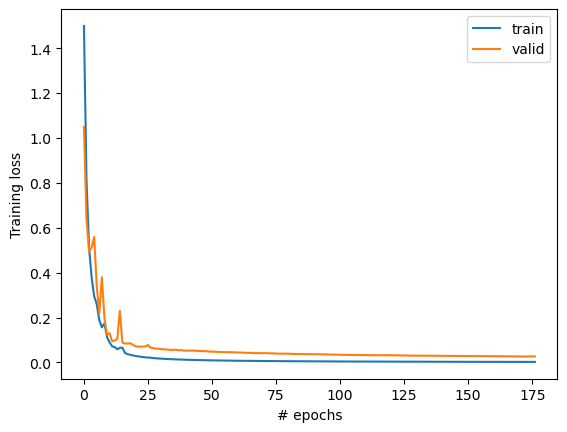

In [71]:
plt.plot(history.history['loss'],label ="train")
plt.plot(history.history['val_loss'],label ="valid")
plt.xlabel('# epochs')
plt.ylabel('Training loss')
plt.legend(loc='best');

> Donner la prédiction du dernier modèle ajusté (par early stopping) sur l'échantillon test `X_test_nor`. Calculer le risque estimé sur les données de test en utilisant la méthode `.evaluate()`. Calculer enfin le taux de mauvais classement sur l'échantillon test.

In [89]:
### TO DO ###
fitted = model.predict(X_test_nor)
fitted1 = np.array([np.argmax(y_predicted) for y_predicted in fitted])

evaluated = model.evaluate(X_test_nor, to_categorical(y_test), batch_size=32)

(fitted1 != y_test).mean()

23/23 [==============================] - 0s 12ms/step - loss: 0.1167 - accuracy: 0.9764


0.02364394993045897

## Application : Données MNIST

Charger les données [handwritten digits MNIST](http://yann.lecun.com/exdb/mnist/) :

In [107]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()  
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


height, width, depth = 28, 28, 1 #  28x28 and 1 canal pour le niveau de gris
num_classes = 10

num_train = 60000 
num_test = 10000  

X_train = X_train.reshape(num_train, height * width)  # vecteur 
X_test = X_test.reshape(num_test, height * width) # vecteur 

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

X_train_nor = X_train / 255 # normalisation dans  [0, 1]  
X_test_nor = X_test / 255 # normalisation dans  [0, 1]  

> Définir et ajuster un réseau de neurones à deux couches cachées. 
> On pourra dans un premier temps choisir les paramètres ci-dessous. 
> On pourra aussi utiliser l'optimiseur adagrad :    
> `adag = keras.optimizers.Adagrad(lr=0.01)`

In [108]:
batch_size = 128  
num_epochs = 40  
hidden_size = 512  

In [109]:
# Réseau
from keras.optimizers import Adagrad
model = Sequential()

model.add(Dense(hidden_size, input_dim=28*28, kernel_initializer = mon_init))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=Adagrad(lr=0.1),
              loss='categorical_crossentropy',
              metrics = ['accuracy'] )

model.fit(X_train_nor, y_train, epochs = num_epochs, batch_size = batch_size)

/Users/dgalembeck/miniforge3/envs/IA/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
/Users/dgalembeck/miniforge3/envs/IA/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adagrad.py:81: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/40


2023-01-06 15:35:39.341038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 13ms/step - loss: 0.4109 - accuracy: 0.8749
Epoch 2/40
469/469 [==============================] - 6s 13ms/step - loss: 0.2780 - accuracy: 0.9155
Epoch 3/40
469/469 [==============================] - 6s 13ms/step - loss: 0.2577 - accuracy: 0.9214
Epoch 4/40
469/469 [==============================] - 6s 12ms/step - loss: 0.2466 - accuracy: 0.9240
Epoch 5/40
469/469 [==============================] - 6s 13ms/step - loss: 0.2391 - accuracy: 0.9266
Epoch 6/40
469/469 [==============================] - 6s 12ms/step - loss: 0.2339 - accuracy: 0.9282
Epoch 7/40
469/469 [==============================] - 6s 13ms/step - loss: 0.2293 - accuracy: 0.9297
Epoch 8/40
469/469 [==============================] - 6s 13ms/step - loss: 0.2260 - accuracy: 0.9290
Epoch 9/40
469/469 [==============================] - 6s 13ms/step - loss: 0.2225 - accuracy: 0.9305
Epoch 10/40
469/469 [==============================] - 6s 13ms/step - loss: 0.2197 - accuracy: 0.9311


> En reproduisant les codes proposés sur ce [blog](https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/), essayer d'améliorer les performances de votre réseau en choisissant mieux les paramètres par validation croisée à l'aide de la fonction `GridSearchCV` de sckit-learn. Attention, cette validation croisée s'avère très couteuse en temps de calcul...

In [124]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(hidden_size, input_dim=28*28, kernel_initializer = init))
    model.add(Activation("tanh"))
    model.add(Dense(K))
    model.add(Activation("softmax"))

    model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics = ['accuracy'] )
    return model

model = KerasClassifier(model=create_model, verbose=0)
print(model.get_params().keys())

optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]

param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, model__init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train_nor, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 

2023-01-06 16:21:48.967834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-06 17:25:42.931807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-06 17:25:51.438104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 